### Assignment for March 23

1. Read these for six blog posts for background:

http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/

2. Make sure seaborn is installed:

```
conda install seaborn
conda install pillow
```

and use it to do the color palette tutorial here:

http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html

3.  Transfer this image tutorial to a notebook:

http://matplotlib.org/users/image_tutorial.html#importing-image-data-into-numpy-arrays

and add three new cells, each showing the stinkbug image with a different colormap
you've generated with seaborn light_palette, dark_palette and cube_helix, respectively.
Include a colorbar for each image.

The cell below shows how to import the stinkbug.

Importing image data into Numpy arrays
======================================

Loading image data is supported by the
[Pillow](http://python-imaging.github.io/) library. Natively, matplotlib
only supports PNG images. The commands shown below fall back on Pillow
if the native read fails.

The image used in this example is a PNG file, but keep that Pillow
requirement in mind for your own data.

Here's the image we're going to play with:

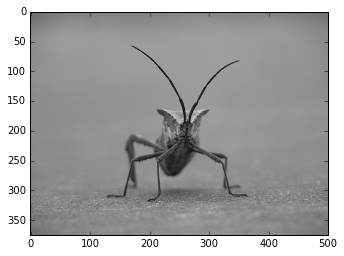

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from pathlib import Path
import a212data
%matplotlib inline
datadir = a212data.__path__[0]
stinkpath = Path(datadir).joinpath('stinkbug.png')
img=mpimg.imread(str(stinkpath))
imgplot = plt.imshow(img)

It's a 24-bit RGB PNG image (8 bits for each of R, G, B). Depending on
where you get your data, the other kinds of image that you'll most
likely encounter are RGBA images, which allow for transparency, or
single-channel grayscale (luminosity) images.

In [54]:
print(img.shape)
print(img.dtype)

(375, 500, 3)
float32


Note the dtype there - float32. Matplotlib has rescaled the 8 bit data
from each channel to floating point data between 0.0 and 1.0. As a side
note, the only datatype that Pillow can work with is uint8. Matplotlib
plotting can handle float32 and uint8, but image reading/writing for any
format other than PNG is limited to uint8 data. Why 8 bits? Most
displays can only render 8 bits per channel worth of color gradation.
Why can they only render 8 bits/channel? Because that's about all the
human eye can see. More here (from a photography standpoint): [Luminous
Landscape bit depth
tutorial](http://www.luminous-landscape.com/tutorials/bit-depth.shtml).

Each inner list represents a pixel. Here, with an RGB image, there are 3
values. Since it's a black and white image, R, G, and B are all similar.
An RGBA (where A is alpha, or transparency), has 4 values per inner
list, and a simple luminance image just has one value (and is thus only
a 2-D array, not a 3-D array). For RGB and RGBA images, matplotlib
supports float32 and uint8 data types. For grayscale, matplotlib
supports only float32. If your array data does not meet one of these
descriptions, you need to rescale it.

Plotting numpy arrays as images
-------------------------------

So, you have your data in a numpy array (either by importing it, or by
generating it). Let's render it. In Matplotlib, this is performed using
the \~matplotlib.pyplot.imshow function. Here we'll grab the plot
object. This object gives you an easy way to manipulate the plot from
the prompt.

In [55]:
imgplot = plt.imshow(img)

You can also plot any numpy array.

### Applying pseudocolor schemes to image plots

Pseudocolor can be a useful tool for enhancing contrast and visualizing
your data more easily. This is especially useful when making
presentations of your data using projectors - their contrast is
typically quite poor.



Pseudocolor is only relevant to single-channel, grayscale, luminosity
images. We currently have an RGB image. Since R, G, and B are all
similar (see for yourself above or in your data), we can just pick one
channel of our data:

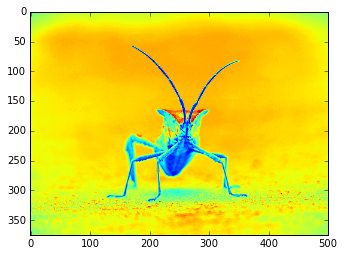

In [56]:
lum_img = img[:,:,0]
plt.imshow(lum_img)
display(plt.gcf())

This is array slicing.  You can read more in the `Numpy tutorial
<http://www.scipy.org/Tentative_NumPy_Tutorial>`_.

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table,
LUT), is applied.  The default is called jet.  There are plenty of
others to choose from.

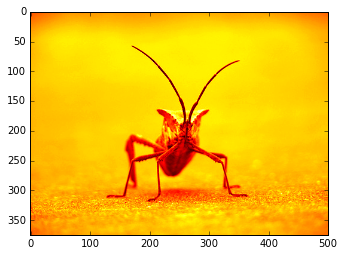

In [57]:
plt.imshow(lum_img, cmap="hot")
display(plt.gcf())

Note that you can also change colormaps on existing plot objects using
the \~matplotlib.image.Image.set\_cmap method:

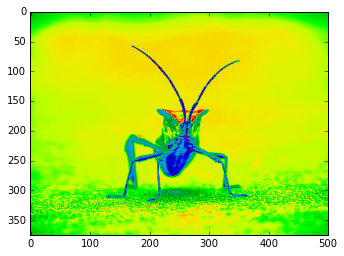

In [58]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('spectral')
display(plt.gcf())

 **note**

However, remember that in the IPython notebook with the inline
backend, you can't make changes to plots that have already been
rendered unless you are using the object oriented matplotlib interface and have set 

```
c = get_config()
c.InlineBackend.close_figures=False
```

in ipython_config.py

Otherwise, if you create imgplot here in one cell, you cannot call
set\_cmap() on it in a later cell and expect the earlier plot to change. Make sure that you enter these commands together in one cell.
plt commands will not change plots from earlier cells.

There are many other colormap schemes available. See the [list and
images of the colormaps](../examples/color/colormaps_reference.html).

### Color scale reference

It's helpful to have an idea of what value a color represents. We can do
that by adding color bars.



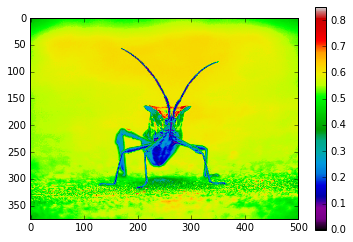

In [59]:
plt.close('all')
lum_img = img[:, :, 0]
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('spectral')
plt.colorbar()

This adds a colorbar to your existing figure. This won't automatically
change if you change you switch to a different colormap - you have to
re-create your plot, and add in the colorbar again.

### Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand the
contrast in a particular region while sacrificing the detail in colors
that don't vary much, or don't matter. A good tool to find interesting
regions is the histogram. To create a histogram of our image data, we
use the \~matplotlib.pyplot.hist function.

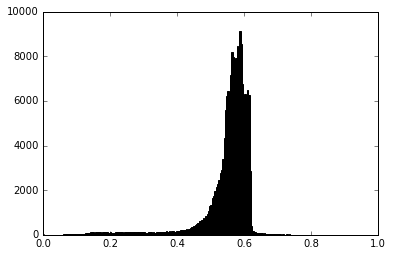

In [60]:
plt.close('all')
lum_img = img[:,:,0]
out=plt.hist(lum_img.flatten(), 256, range=(0.0, 1.0), fc='k', ec='k')

Most often, the "interesting" part of the image is around the peak, and
you can get extra contrast by clipping the regions above and/or below
the peak. In our histogram, it looks like there's not much useful
information in the high end (not many white things in the image). Let's
adjust the upper limit, so that we effectively "zoom in on" part of the
histogram. We do this by passing the clim argument to imshow. You could
also do this by calling the \~matplotlib.image.Image.set\_clim method of
the image plot object, but make sure that you do so in the same cell as
your plot command when working with the IPython Notebook - it will not
change plots from earlier cells.


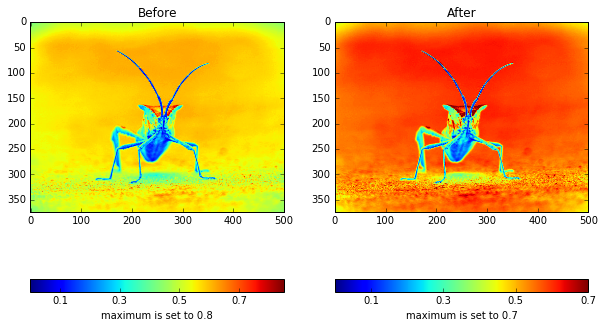

In [61]:
plt.close('all')
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(10,8))
the_img=ax1.imshow(lum_img)
cax1=plt.colorbar(the_img,ticks=[0.1,0.3,0.5,0.7], orientation='horizontal',ax=ax1)
cax1.set_label('maximum is set to 0.8')
ax1.set_title('Before')
the_img2 = ax2.imshow(lum_img)
the_img2.set_clim(0.0,0.7)
ax2.set_title('After')
cax2=plt.colorbar(the_img2,ticks=[0.1,0.3,0.5,0.7], orientation='horizontal',ax=ax2)
cax2.set_label('maximum is set to 0.7')

### Array interpolation schemes

Interpolation calculates what the color or value of a pixel "should" be,
according to different mathematical schemes. One common place that this
happens is when you resize an image. The number of pixels change, but
you want the same information. Since pixels are discrete, there's
missing space. Interpolation is how you fill that space. This is why
your images sometimes come out looking pixelated when you blow them up.
The effect is more pronounced when the difference between the original
image and the expanded image is greater. Let's take our image and shrink
it. We're effectively discarding pixels, only keeping a select few. Now
when we plot it, that data gets blown up to the size on your screen. The
old pixels aren't there anymore, and the computer has to draw in pixels
to fill that space.

We'll use the Pillow library that we used to load the image also to
resize the image.

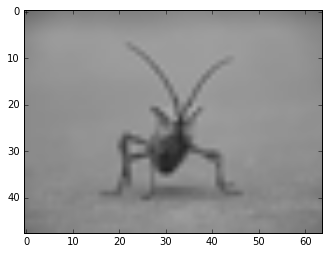

In [62]:
plt.close('all')
from PIL import Image
img = Image.open(str(stinkpath))
img.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
imgplot = plt.imshow(img)


We have used the default interpolation, bilinear, since we did not give
matplotlib.pyplot.imshow any interpolation argument.

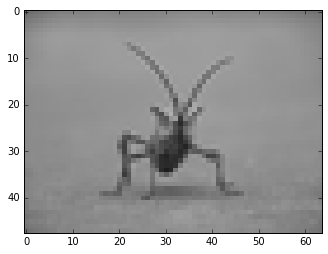

In [63]:
plt.close('all')
imgplot = plt.imshow(img, interpolation="nearest")

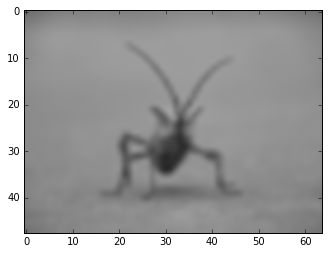

In [64]:
plt.close('all')
imgplot = plt.imshow(img, interpolation="bicubic")

Bicubic interpolation is often used when blowing up photos - people tend
to prefer blurry over pixelated.

### Seaborn palettes

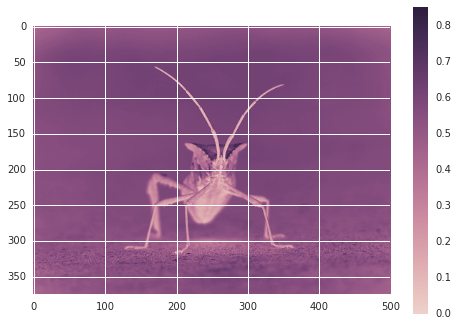

In [76]:
plt.close('all')
import seaborn as sns
cmap = sns.cubehelix_palette(256,as_cmap=True)
fig,ax =plt.subplots(1,1)
the_img=ax.imshow(lum_img,cmap=cmap)
plt.colorbar(the_img,ax=ax)

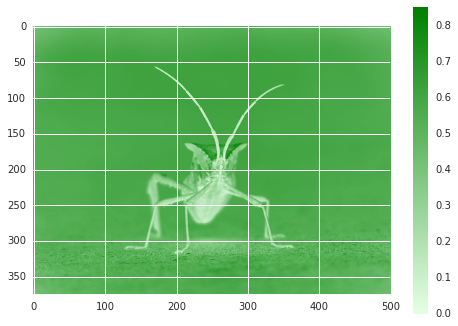

In [78]:
cmap = sns.light_palette("green",256,as_cmap=True)
fig,ax =plt.subplots(1,1)
the_img=ax.imshow(lum_img,cmap=cmap)
plt.colorbar(the_img,ax=ax)

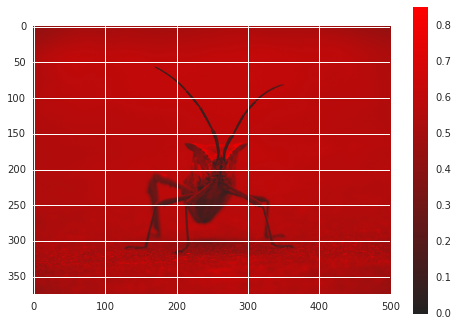

In [79]:
cmap = sns.dark_palette("red",256,as_cmap=True)
fig,ax =plt.subplots(1,1)
the_img=ax.imshow(lum_img,cmap=cmap)
plt.colorbar(the_img,ax=ax)